Please enter the filepath to the file below or dowload through the kaggle api 

In [113]:
file_path = "/Users/gimle/Data 201/Data 201 project 2/winemag-data-130k-v2.csv"

In [59]:
import subprocess

try:
    import kaggle
    print("Kaggle is installed.")
except ImportError:
    print("Kaggle is not installed. Installing now...")
    subprocess.check_call(["pip", "install", "kaggle"])

Kaggle is installed.


In [161]:
import os as os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [115]:
from kaggle.api.kaggle_api_extended import KaggleApi

if os.path.exists(file_path):
    print("file correctly installed", file_path)
    
# if kaggle.json exists 
elif os.path.exists(os.path.expanduser("~/.kaggle/kaggle.json")):
    print("File does not exist, but now downloading from kaggle")
    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files('zynicide/wine-reviews', path='.', unzip=True)
    if os.path.exists(file_path):
        print("File is here:", file_path)
    else:
        print("File in the wrong place pls check.")
else: 
    print("please download the file / get kaggle API: https://www.kaggle.com/docs/api") 

file correctly installed /Users/gimle/Data 201/Data 201 project 2/winemag-data-130k-v2.csv


In [117]:
if os.path.exists(file_path): 
    sommelier = pandas.read_csv(file_path)
    print("somelier created")
   
else: 
    print("youve got fix the filepath") 

somelier created


In [125]:
 sommelier.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [135]:
sommelier.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'taster_name', 'title', 'variety', 'winery', 'vintage'],
      dtype='object')

In [129]:
# Removing unnecessary columns
somelier.drop(['Unnamed: 0', 'region_2',
       'taster_twitter_handle'], axis=1, inplace=True) 

We have chosen to add an extra column that includes the vintage as most bottles appear to contain the vintage in their title 

In [174]:
# find vintage, year pattern is \b\d{4}\b
sommelier['vintage'] = sommelier['title'].str.extract(r'(\b\d{4}\b)')

In [176]:
vintage_count = somelier['vintage'].value_counts()
print(vintage_count) 

vintage
2013    15847
2012    15717
2014    15554
2011    12530
2010    12149
        ...  
1503        1
1935        1
1969        1
1967        1
1945        1
Name: count, Length: 90, dtype: int64


In [178]:
somelier.isna().sum() 

country            0
description        0
designation    37453
points             0
price           8992
province           0
region_1       21183
taster_name    26243
title              0
variety            0
winery             0
vintage         4607
dtype: int64

In [180]:
# there are a handful of wines that lack country, 
# province and one that lacks variety, there is limited value in keeping these so we will remove them
sommelier.dropna(subset=['variety','province','country','vintage'], inplace = True)
# checking to see if we were successful
sommelier.isna().sum()

country            0
description        0
designation    37148
points             0
price           8522
province           0
region_1       20633
taster_name    25161
title              0
variety            0
winery             0
vintage            0
dtype: int64

In [ ]:
# Checking types
print(sommelier.dtypes)

In [ ]:
# Making year an integer
sommelier['vintage'] = sommelier['vintage'].astype(int)

In [ ]:
# Making removing obvious mistakes
# Wines have been discovered from as early as the 15th century I believe, but they are only curiosities and have little to no acutal flavour value, they are therefore not included in our search
sommelier = sommelier[(sommelier['vintage'] >= 1600) & (sommelier['vintage'] <= 2024)]

# To do list EDA:  
1. Remove Twitter handles -> done
2. Remove unnamed column -> done
3. Remove Region 2 (unnecessary)  -> done
4. Check that every wine has the following -> done
   points 
   price
   variety
   country
   province
5. Structure the dataframe correctly -> done
6. create new column based on vintage -> done
7. Print examples from description column -> NOT DONE YET
8. Eliminate vintage value counts that are unreasonable (under 1000 and over 2024)
9. Check frequency of countries and regions

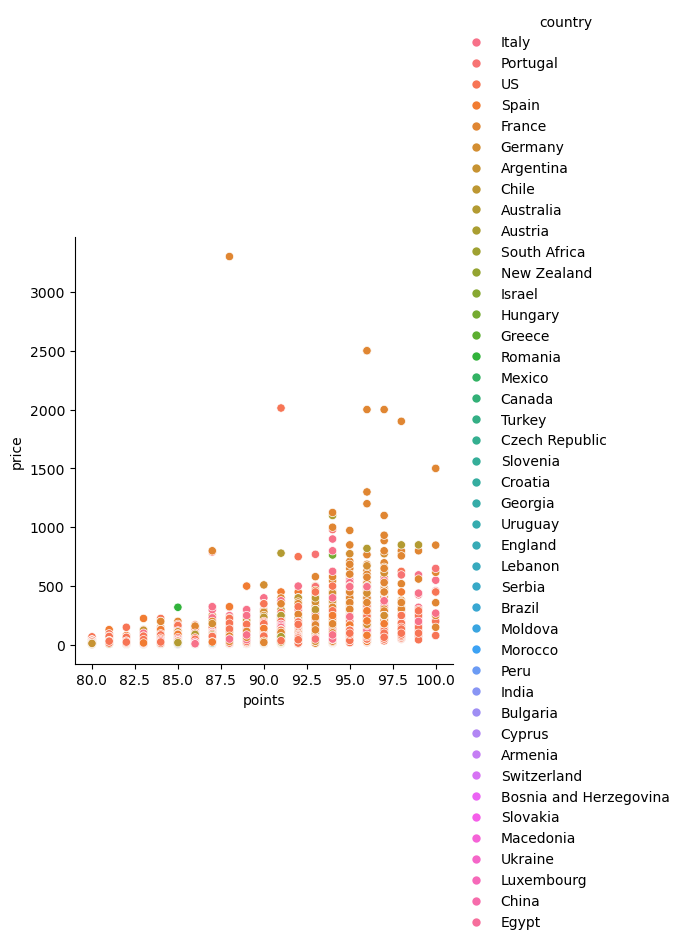

In [194]:
sns.relplot(x = 'points',
            y = "price", 
            data = sommelier,
            kind= "scatter", 
            hue = 'country',
            )
#plt.title
#plt.xlabel
#plt.ylabel
#plt.show()

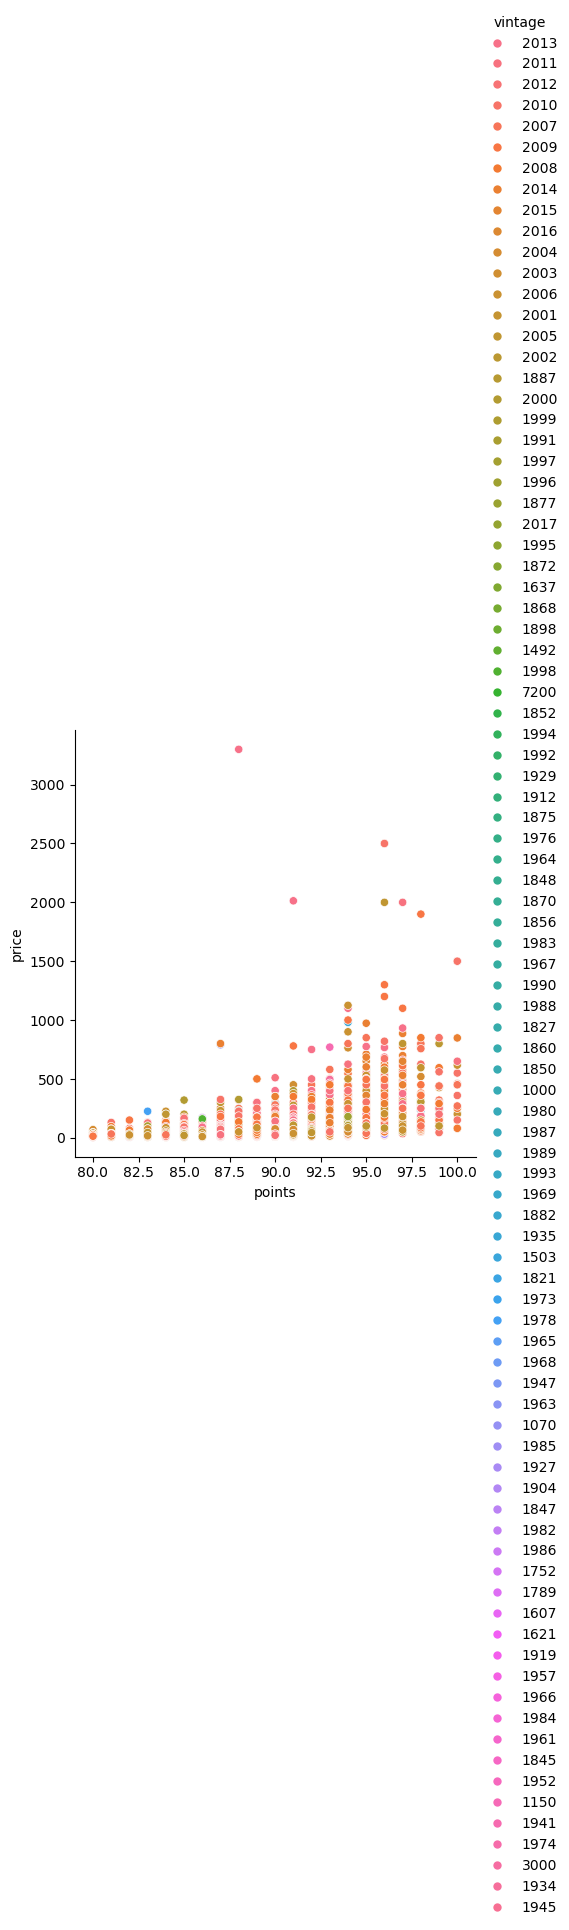

In [195]:
# It is interesting that the wine reviewers clearly do not review wine that is below "80%", In reality they operate on a 1 to 20 scale, and then add 80 points 
sns.relplot(x = 'points',
            y = "price", 
            data = sommelier,
            kind= "scatter", 
            hue = 'vintage',
            )
#plt.title
#plt.xlabel
#plt.ylabel
# plt.show()

In [ ]:
colors = sommelier['taster_name'].apply(lambda x: 'blue' if x == 'Robert Voss' else 'gray')

In [ ]:
# 3D plot of Robert Voss and his review preference 
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)

x = 'points'
y = 'price'
z = 'vintage'


ax.scatter(x, y, z, c=x, marker='o')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)

plt.yscale('log')
plt.show()


# To do list data exploration: 
1. Price vs points graph for region, taster, variety, winery, vintage, 
2. Bar chart to see skewedness of no price  (are these highly rated wines or poorly rated)
3. Histograms,
4. Scatter plot showing the distribution of our good friend Roger Voss
5. Plot specific countries against each other, plot regions, and vintages against each other.
6. Check to see if during certain years different regions had different outcomes
7. add 'jitter'
8. add log scale on price
9. map in three dimensions, vintage, price, rating, colour = country , make a number of these for each country.
10. Make one for Robert Voss, to see if there is a difference between him and average, 

# To do list for ML and Tree based models

Approaches: 
We have several potential approaches to looking at this data
1. Can we find the patterns associated with Roger Voss, this dataset's most prolific wine reviewer?
2. Can we discover the best years of wine through a tree-based model (most highly rated vintages)
3. Generally, what is the best wine combination with an exceptional score?
4. Generally, what kind of wine tends to be reviewed by our friend Robert Voss or another top reviewer? 
5. What kind of wine is the profile of a particular country?
6. What are the rating vs. price distributions of different countries (especially France, Italy, South Africa, New Zealand, and the United States?)

In other words, based on our homework so far, can we find Robert Voss or the country of New Zealand for example in the same approximate way that we found breast cancer, 

we have in this dataset 7 possible features, 

1. Create a binary target variable

2. Encoding Categorical Features

You can use one-hot encoding or label encoding. One-hot encoding is generally preferable as it does not imply any order:
Note on High Cardinality

If vintage, country, or region have many unique values, consider other encoding methods like target encoding or simply grouping less frequent categories into an 'Other' category to reduce dimensionality

3. Handle Numeric Variables
Ensure that numeric features like price and rating do not require scaling for tree-based models, as these models are not sensitive to the scale of the data. However, it is good practice to check for outliers and handle them accordingly as they might affect the model's performance.

4. Splitting the Data
Split your data into training and testing sets to evaluate the model’s performance:

6. Building the Tree Model
7. Include logistic regression 

8. Feature Importance
After training, check which features are most important for predictions. This can provide insights into what characteristics Robert Voss might be looking at when deciding to rate a wine:
